**Linear Regression**

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fbourgey/fre-gy-7773-mlfe/blob/main/03_linear_regression.ipynb)

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

sns.set_theme("talk")
sns.set_style("whitegrid")
mpl.rcParams["figure.figsize"] = (8, 6)

# Examples

## 2D Linear Regression with noise

$$
    y = \beta_0 + \beta_1 x + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma^2)
$$

In [2]:
rng = np.random.default_rng(42)
n_samples = 100

# True parameters
beta_0 = 2.0  # Intercept
beta_1 = 3.0  # Slope

# Generate data and noise
X = rng.normal(size=n_samples)
epsilon = rng.normal(size=n_samples)

# Generate dependent variable
Y = beta_0 + beta_1 * X + epsilon

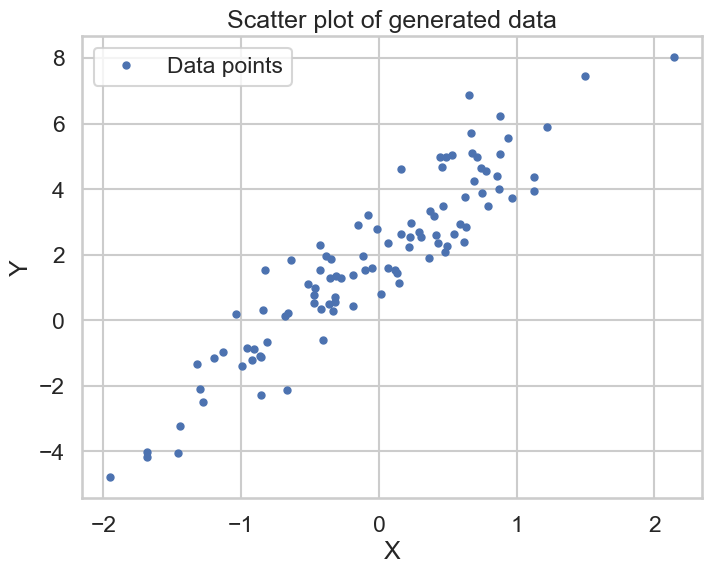

In [3]:
fig, ax = plt.subplots()
ax.plot(X, Y, "o", markersize=5, label="Data points")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Scatter plot of generated data")
ax.legend()
plt.show()

In [4]:
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")

Shape of X: (100,)
Shape of Y: (100,)


In [5]:
# Code from scratch to compute beta_0 and beta_1
X_mean = sum(X) / n_samples
Y_mean = sum(Y) / n_samples
beta_1 = sum((X - X_mean) * (Y - Y_mean)) / sum((X - X_mean) ** 2)
beta_0 = Y_mean - beta_1 * X_mean

print(
    f"Estimated coefficients:\n"
    f"Intercept (beta_0): {beta_0:.4f}\n"
    f"Slope (beta_1): {beta_1:.4f}"
)

Estimated coefficients:
Intercept (beta_0): 1.9954
Slope (beta_1): 3.1192


In [6]:
# Using numpy functions to compute beta_0 and beta_1
beta_1 = np.cov(X, Y, bias=True)[0, 1] / np.var(X, ddof=0)
beta_0 = np.mean(Y) - beta_1 * np.mean(X)

print(
    f"Estimated coefficients:\n"
    f"Intercept (beta_0): {beta_0:.4f}\n"
    f"Slope (beta_1): {beta_1:.4f}"
)

Estimated coefficients:
Intercept (beta_0): 1.9954
Slope (beta_1): 3.1192


In [7]:
from sklearn.linear_model import LinearRegression

X_reshaped = X.reshape(-1, 1)  # Reshape X to be a 2D array
model = LinearRegression()
model.fit(X_reshaped, Y)
beta_0 = model.intercept_
beta_1 = model.coef_[0]

print(
    f"Estimated coefficients using sklearn:\n"
    f"Intercept (beta_0): {beta_0:.4f}\n"
    f"Slope (beta_1): {beta_1:.4f}"
)

Estimated coefficients using sklearn:
Intercept (beta_0): 1.9954
Slope (beta_1): 3.1192


In [8]:
# using normal equation

# add intercept term to X
X_new = np.ones((n_samples, 2))  # shape (n_samples, 2)
a = np.ones((2, 3))        # 2x3 的浮点数组，元素全为 1.0
b = np.ones(5, dtype=int) # 1D 整数数组，元素为 1
X_new[:, 1] = X
print(X_new.shape)

# compute coefficients using normal equation
# this is bad for large datasets as we need to compute the inverse of a matrix
beta = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ Y

print(
    f"Estimated coefficients using sklearn:\n"
    f"Intercept (beta_0): {beta[0]:.4f}\n"
    f"Slope (beta_1): {beta[1]:.4f}"
)

(100, 2)
Estimated coefficients using sklearn:
Intercept (beta_0): 1.9954
Slope (beta_1): 3.1192


In [9]:
# prefer to use np.linalg.pinv to avoid issues with singular matrices
beta = np.linalg.pinv(X_new.T @ X_new) @ X_new.T @ Y
print(beta)

# or more simply
beta = np.linalg.pinv(X_new) @ Y
print(beta)

# we can also use np.solve
beta = np.linalg.solve(X_new.T @ X_new, X_new.T @ Y)
print(beta)

[1.99535902 3.11917464]
[1.99535902 3.11917464]
[1.99535902 3.11917464]


In [10]:
# yet, another way is to use scipy.linalg.lstsq
from scipy.linalg import lstsq

beta, residuals, rank, s = lstsq(X_new, Y)
print(beta)

[1.99535902 3.11917464]


In [11]:
# using statsmodels
X_sm = sm.add_constant(X)  # adds a constant term to the predictor
model = sm.OLS(Y, X_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     604.9
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           1.02e-43
Time:                        13:24:22   Log-Likelihood:                -138.87
No. Observations:                 100   AIC:                             281.7
Df Residuals:                      98   BIC:                             287.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9954      0.098     20.316      0.0

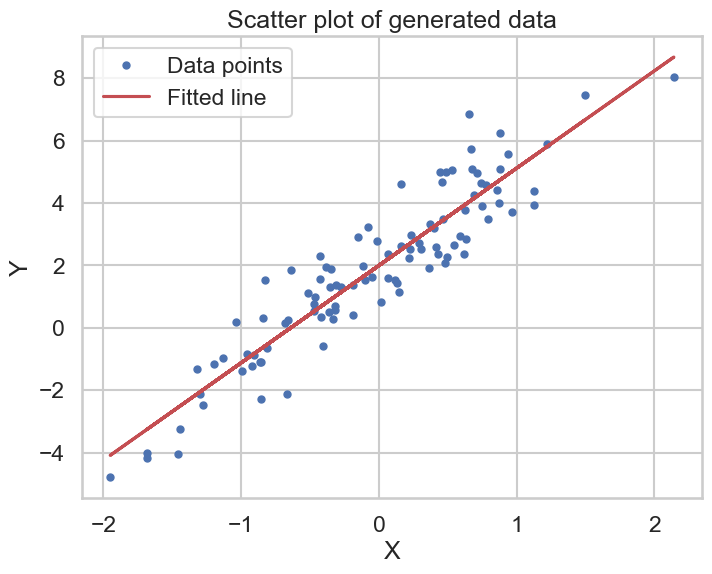

In [12]:
fig, ax = plt.subplots()
ax.plot(X, Y, "o", markersize=5, label="Data points")
ax.plot(X, beta_0 + beta_1 * X, "r-", label="Fitted line")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Scatter plot of generated data")
ax.legend()
plt.show()

## Centering and Scaling

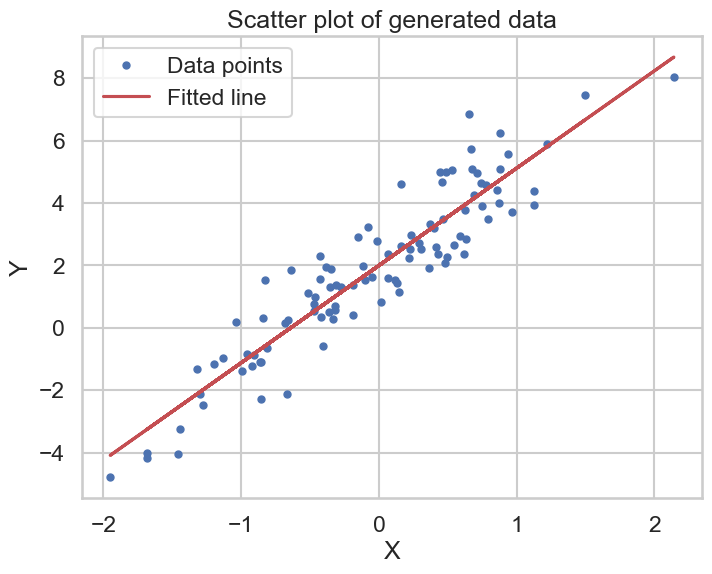

In [13]:
# original
fig, ax = plt.subplots()
ax.plot(X, Y, "o", markersize=5, label="Data points")
ax.plot(X, beta_0 + beta_1 * X, "r-", label="Fitted line")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Scatter plot of generated data")
ax.legend()
plt.show()

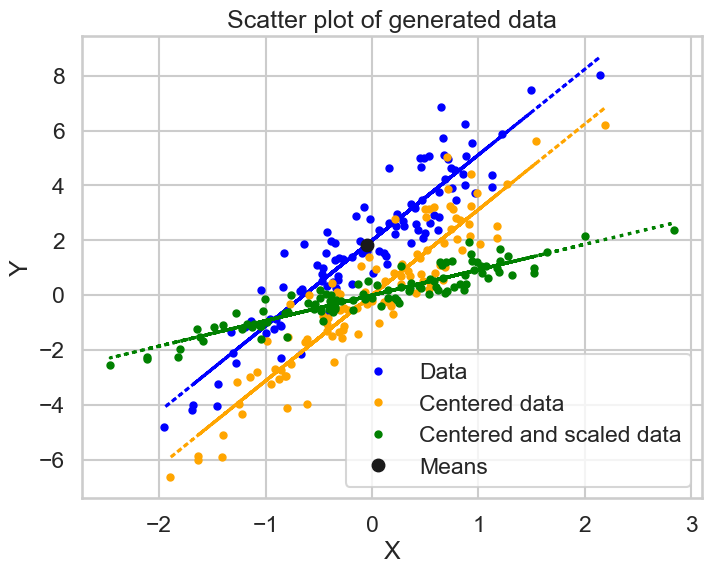

In [14]:
# centered
X_mean = np.mean(X)
Y_mean = np.mean(Y)
X_centered = X - X_mean
Y_centered = Y - Y_mean

# fit model on centered data
model = LinearRegression()
model.fit(X_centered.reshape(-1, 1), Y_centered)
beta_0_centered = model.intercept_
beta_1_centered = model.coef_[0]

# centered and scaled
X_centered_scaled = (X - X_mean) / np.std(X)
Y_centered_scaled = (Y - Y_mean) / np.std(Y)
model.fit(X_centered_scaled.reshape(-1, 1), Y_centered_scaled)
beta_0_centered_scaled = model.intercept_
beta_1_centered_scaled = model.coef_[0]

# plot all three
fig, ax = plt.subplots()
# original data
ax.plot(X, Y, "o", markersize=5, color="blue", label="Data")
ax.plot(X, beta_0 + beta_1 * X, ":", color="blue")
# centered data
ax.plot(
    X_centered, Y_centered, "o", markersize=5, color="orange", label="Centered data"
)
ax.plot(X_centered, beta_0_centered + beta_1_centered * X_centered, ":", color="orange")
# centered and scaled data
ax.plot(
    X_centered_scaled,
    Y_centered_scaled,
    "o",
    markersize=5,
    color="green",
    label="Centered and scaled data",
)
ax.plot(
    X_centered_scaled,
    beta_0_centered_scaled + beta_1_centered_scaled * X_centered_scaled,
    ":",
    color="green",
)
ax.plot([X_mean], [Y_mean], "ko", label="Means")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Scatter plot of generated data")
ax.legend()
plt.show()

In [15]:
# check

assert np.isclose(beta_0_centered, 0.0)
assert np.allclose(
    beta_1_centered_scaled, (X_centered_scaled * Y_centered_scaled).mean()
)

Remark: we can also using [scikit-learn's StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to center and scale the data.

## Coefficient of determination or $R$ squared ($R^2$)
https://en.wikipedia.org/wiki/Coefficient_of_determination

R squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It provides an indication of how well the data points fit the regression line.

The formula for R squared is:
$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$
where:
- $SS_{res}$ = the sum of squares of residuals $\sum_i (y_i - \hat{y}_i)^2$
- $SS_{tot}$ = the total sum of squares $\sum_i (y_i - \bar{y})^2$

An $R^2$ of 1 indicates that the regression predictions perfectly fit the data. An $R^2$ of 0 indicates that the model does not explain any of the variability of the response data around its mean.

In [16]:
# compare with statsmodels fitted line
print(f"R-squared: {results.rsquared:.4f}")

R-squared: 0.8606


In [17]:
ss_res = #TODO
ss_tot = #TODO
r_squared = #TODO
print(f"R-squared (manual calculation): {r_squared:.4f}")

SyntaxError: invalid syntax (2116242401.py, line 1)

## Different noise levels

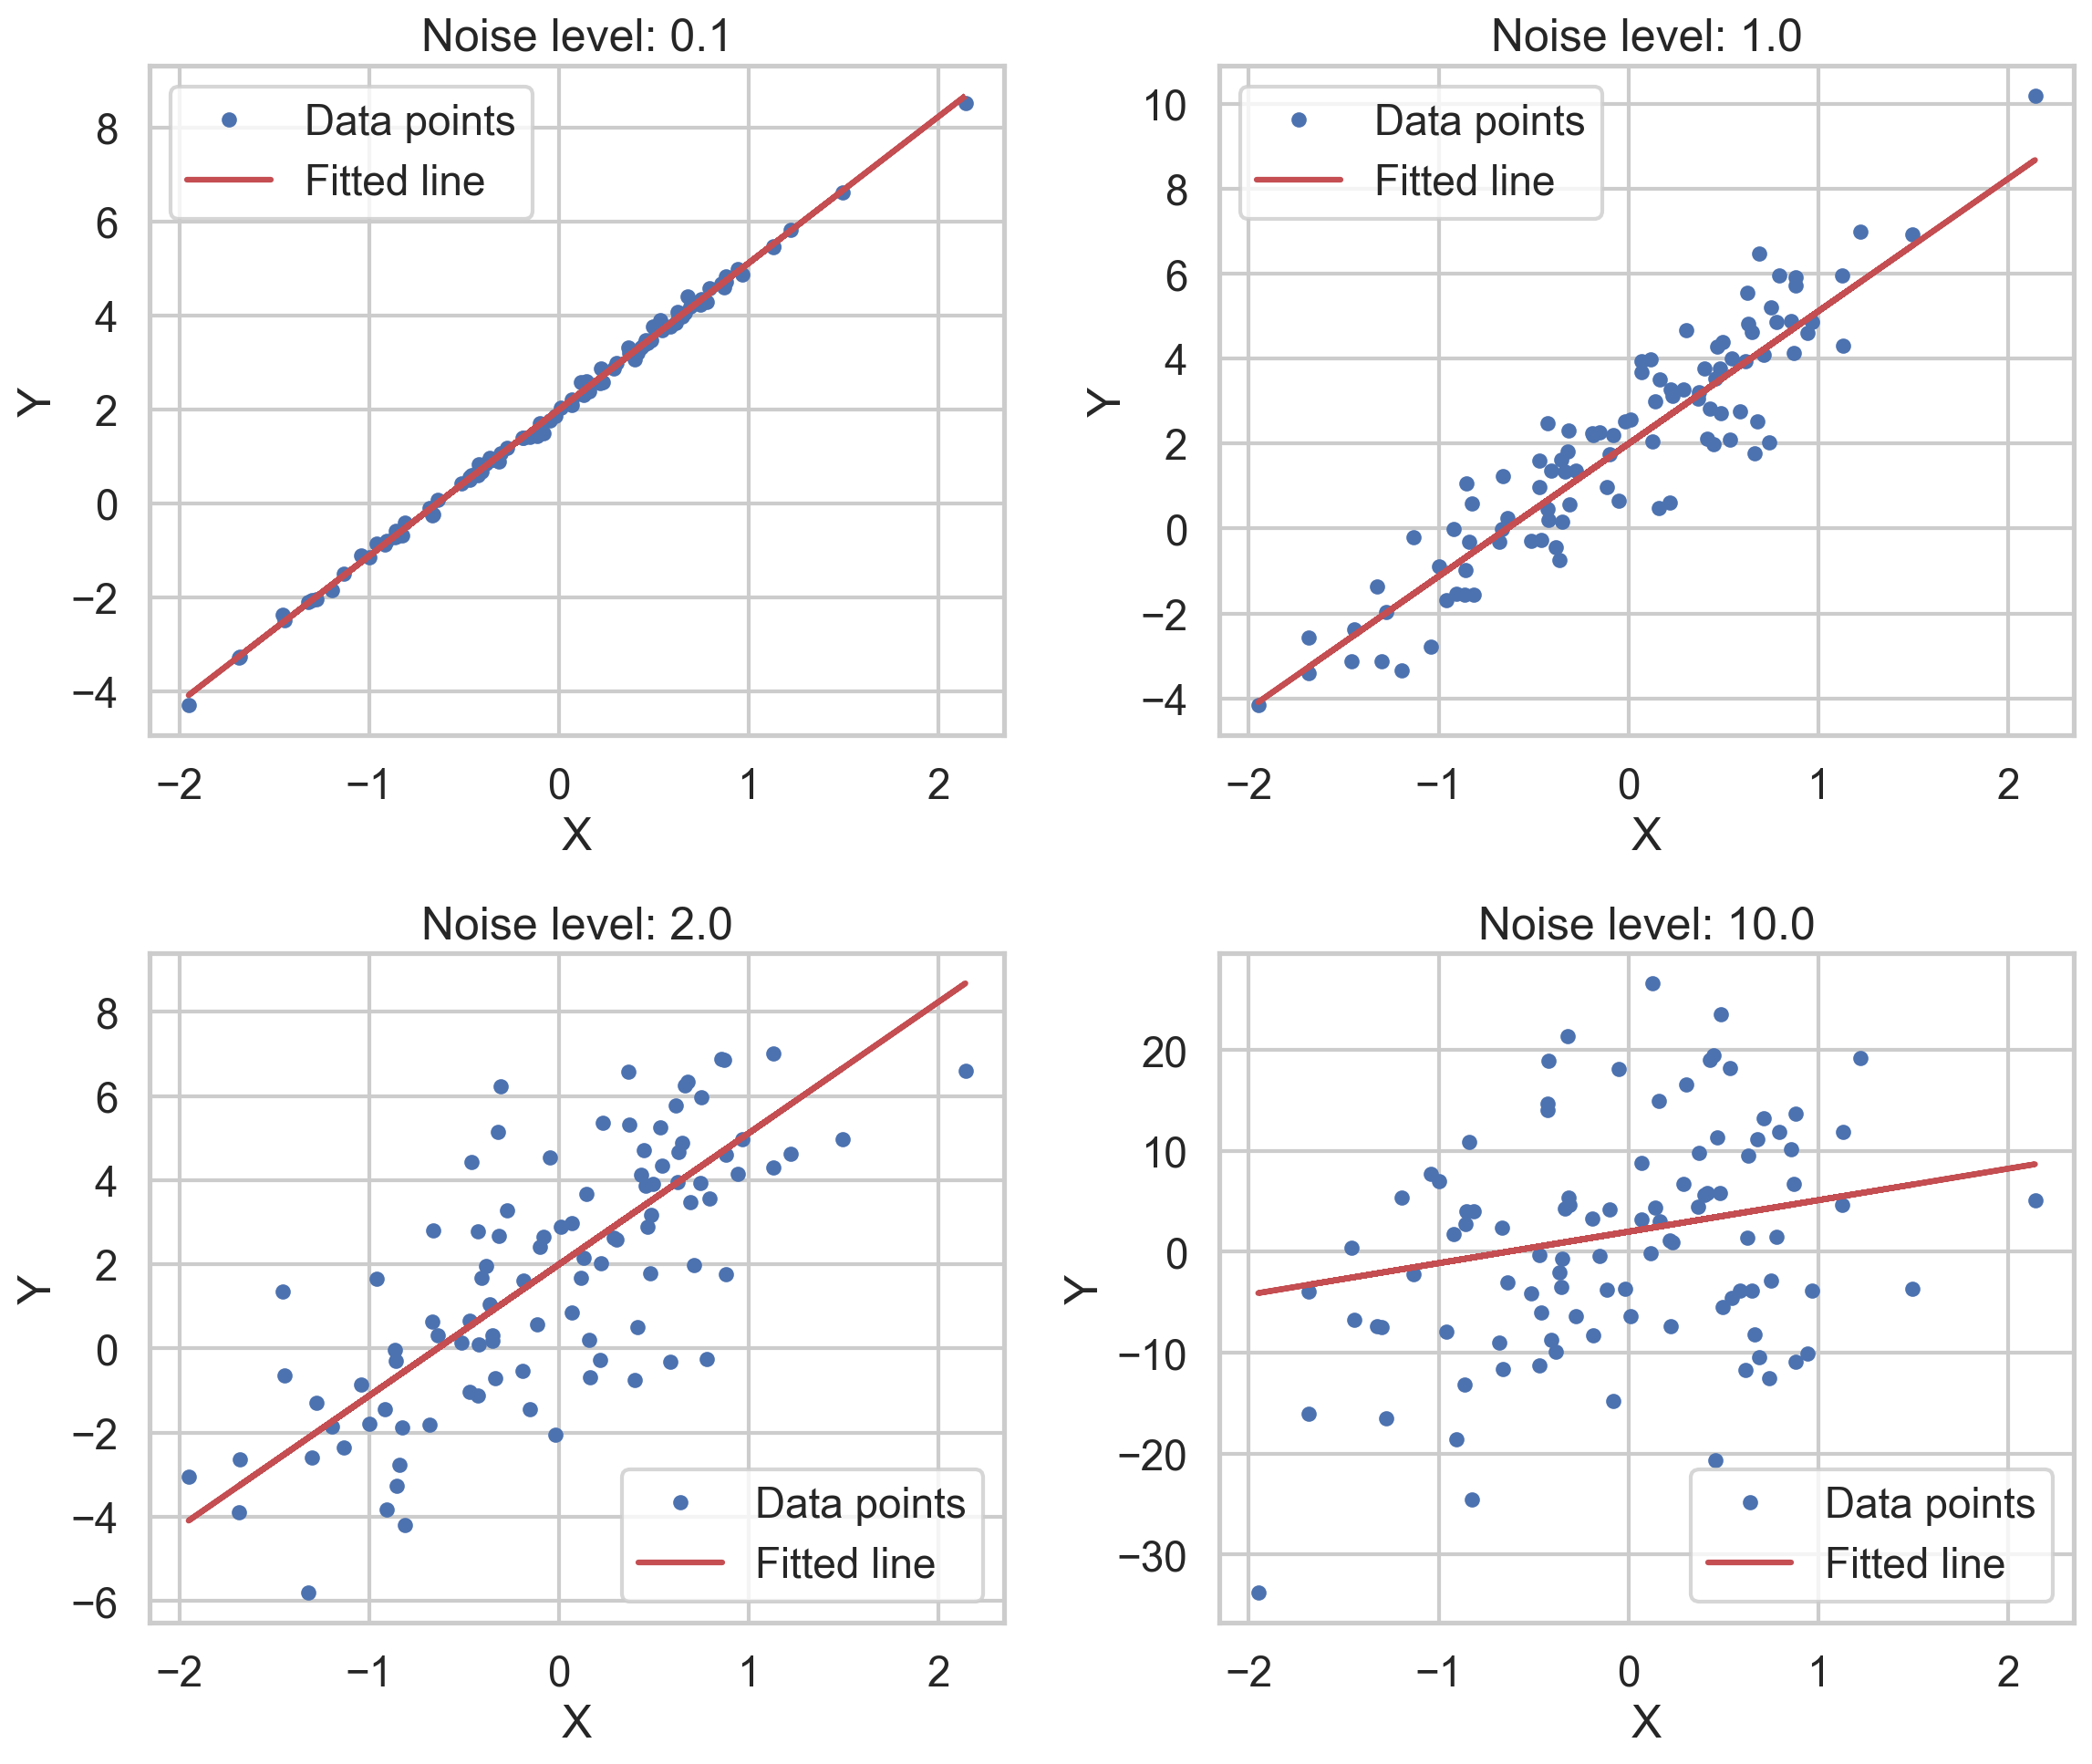

In [ ]:
# create generic function doing the same function
# 4 x 4 plot with different noise levels

noise_levels = [0.1, 1.0, 2.0, 10.0]
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for ax, noise in zip(axs.flatten(), noise_levels, strict=False):
    epsilon = rng.normal(loc=0, scale=noise, size=n_samples)
    Y = beta_0 + beta_1 * X + epsilon
    ax.plot(X, Y, "o", markersize=5, label="Data points")
    ax.plot(X, beta_0 + beta_1 * X, "r-", label="Fitted line")
    ax.set_title(f"Noise level: {noise}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()
plt.tight_layout()
plt.show()

## 3D Linear Regression with noise

$$
    y 
    = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon
    = \bm{\beta}^\top \mathbf{x} + \epsilon,
    \qquad \epsilon \sim \mathcal{N}(0, \sigma^2)
$$

In [18]:
np.random.seed(42)
n = 100

# Generate synthetic data
x1 = np.random.uniform(-5, 5, n)
x2 = np.random.uniform(-5, 5, n)

# True model
beta = np.array([2.0, 1.5, -0.8])
noise = np.random.normal(0, 1, n)

y = beta[0] + beta[1] * x1 + beta[2] * x2 + noise

x0 = np.ones(n)
X = np.column_stack([x0, x1, x2])

In [19]:
print(f"Shape of y: {y.shape}")
print(f"Shape of x1: {x1.shape}")
print(f"Shape of x2: {x2.shape}")
print(f"Shape of X: {X.shape}")

Shape of y: (100,)
Shape of x1: (100,)
Shape of x2: (100,)
Shape of X: (100, 3)


In [20]:
beta_hat = np.linalg.pinv(X) @ y
print("Estimated coefficients:")
print(f"Intercept (beta_0): {beta_hat[0]:.4f}")
print(f"Slope for x1 (beta_1): {beta_hat[1]:.4f}")
print(f"Slope for x2 (beta_2): {beta_hat[2]:.4f}")

Estimated coefficients:
Intercept (beta_0): 2.0994
Slope for x1 (beta_1): 1.4658
Slope for x2 (beta_2): -0.7281


In [21]:
# create regression plane

x1_grid, x2_grid = np.meshgrid(
    np.linspace(x1.min(), x1.max(), 30),
    np.linspace(x2.min(), x2.max(), 30),
)

y_grid = beta_hat[0] + beta_hat[1] * x1_grid + beta_hat[2] * x2_grid

In [22]:
# plotly 3d figure
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter3d(
        x=x1, y=x2, z=y, mode="markers", marker={"size": 4}, name="Data points"
    )
)
fig.update_layout(
    scene={
        "xaxis_title": "X1",
        "yaxis_title": "X2",
        "zaxis_title": "Y",
    }
)
fig.add_trace(
    go.Surface(
        x=x1_grid,
        y=x2_grid,
        z=y_grid,
        colorscale="Viridis",
        opacity=0.5,
        name="Regression Plane",
    )
)
fig.update_traces(showlegend=True)
fig.update_layout(
    title="3D Linear Regression with Regression Plane", width=1200, height=800
)

fig.show()

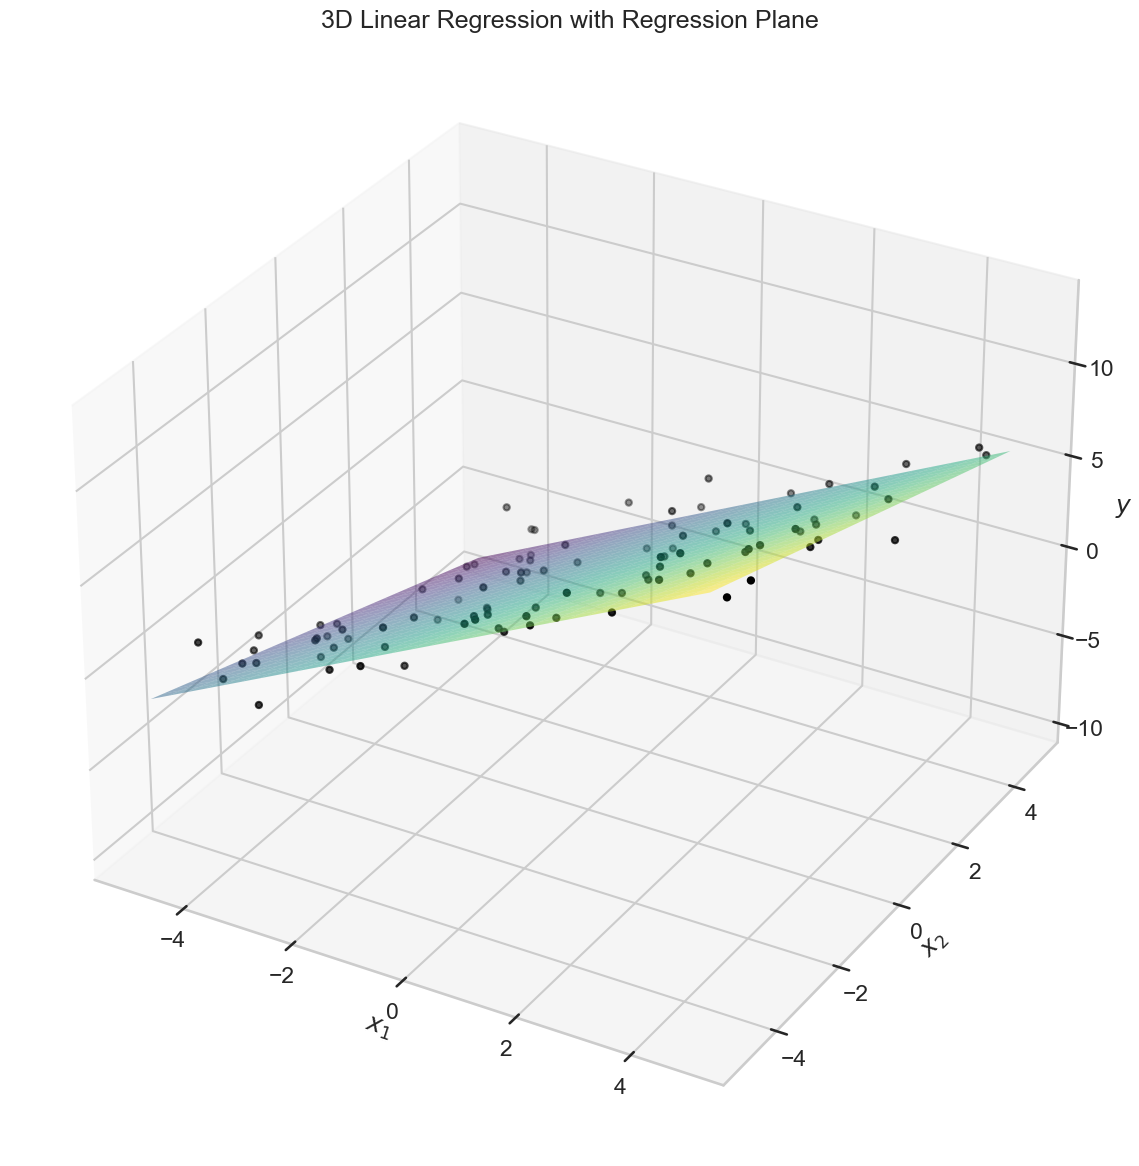

In [23]:
# matplotlib 3d figure
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, cmap="viridis", edgecolor="none")
ax.scatter(x1, x2, y, color="black", s=20)
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.set_zlabel("$y$")
ax.set_title("3D Linear Regression with Regression Plane")
plt.tight_layout()
plt.show()

In [24]:
# we could have also used sklearn

X = np.column_stack([x1, x2])
model = LinearRegression()
model.fit(X, y)
beta_0 = model.intercept_
beta_1, beta_2 =  model.coef_

print(
    f"Estimated coefficients using sklearn:\n"
    f"Intercept (beta_0): {beta_0:.4f}\n"
    f"Slope for x1 (beta_1): {beta_1:.4f}\n"
    f"Slope for x2 (beta_2): {beta_2:.4f}"
)

# to make predictions
new_data = np.array([[1.0, 2.0], [-1.0, 0.5], [3.0, -4.0]])
predictions = model.predict(new_data)
print("Predictions for new data points:")
for i, point in enumerate(new_data):
    print(f"Input: {point}, Predicted Y: {predictions[i]:.4f}")

Estimated coefficients using sklearn:
Intercept (beta_0): 2.0994
Slope for x1 (beta_1): 1.4658
Slope for x2 (beta_2): -0.7281
Predictions for new data points:
Input: [1. 2.], Predicted Y: 2.1091
Input: [-1.   0.5], Predicted Y: 0.2695
Input: [ 3. -4.], Predicted Y: 9.4092


## Macro data

Load the [macrodata](https://www.statsmodels.org/dev/datasets/generated/macrodata.html) dataframe from statsmodels

In [25]:
data = sm.datasets.macrodata.load_pandas().data
data = pd.DataFrame(data)
data["year"] = data["year"].astype(int)

In [26]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [27]:
data.describe()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,1983.876847,2.492611,7221.171901,4825.293103,1012.863862,663.328640,5310.540887,105.075788,667.927586,5.311773,5.884729,239.724153,3.961330,1.336502
std,14.686817,1.118563,3214.956044,2313.346192,585.102267,140.863655,2423.515977,61.278878,455.346381,2.803071,1.458574,37.390450,3.253216,2.668799
min,1959.000000,1.000000,2710.349000,1707.400000,259.764000,460.400000,1886.900000,28.980000,139.600000,0.120000,3.400000,177.146000,-8.790000,-6.790000
25%,1971.000000,1.500000,4440.103500,2874.100000,519.147500,527.959500,3276.950000,41.050000,228.650000,3.515000,4.900000,208.631000,2.270000,-0.085000
50%,1984.000000,2.000000,6559.594000,4299.900000,896.210000,662.412000,4959.400000,104.100000,540.900000,5.010000,5.700000,236.348000,3.240000,1.340000
75%,1996.500000,3.000000,9629.346500,6398.150000,1436.681500,773.049000,6977.850000,159.650000,1102.100000,6.665000,6.800000,271.721500,4.975000,2.630000
max,2009.000000,4.000000,13415.266000,9363.600000,2264.721000,1044.088000,10077.500000,218.610000,1673.900000,15.330000,10.700000,308.013000,14.620000,10.950000


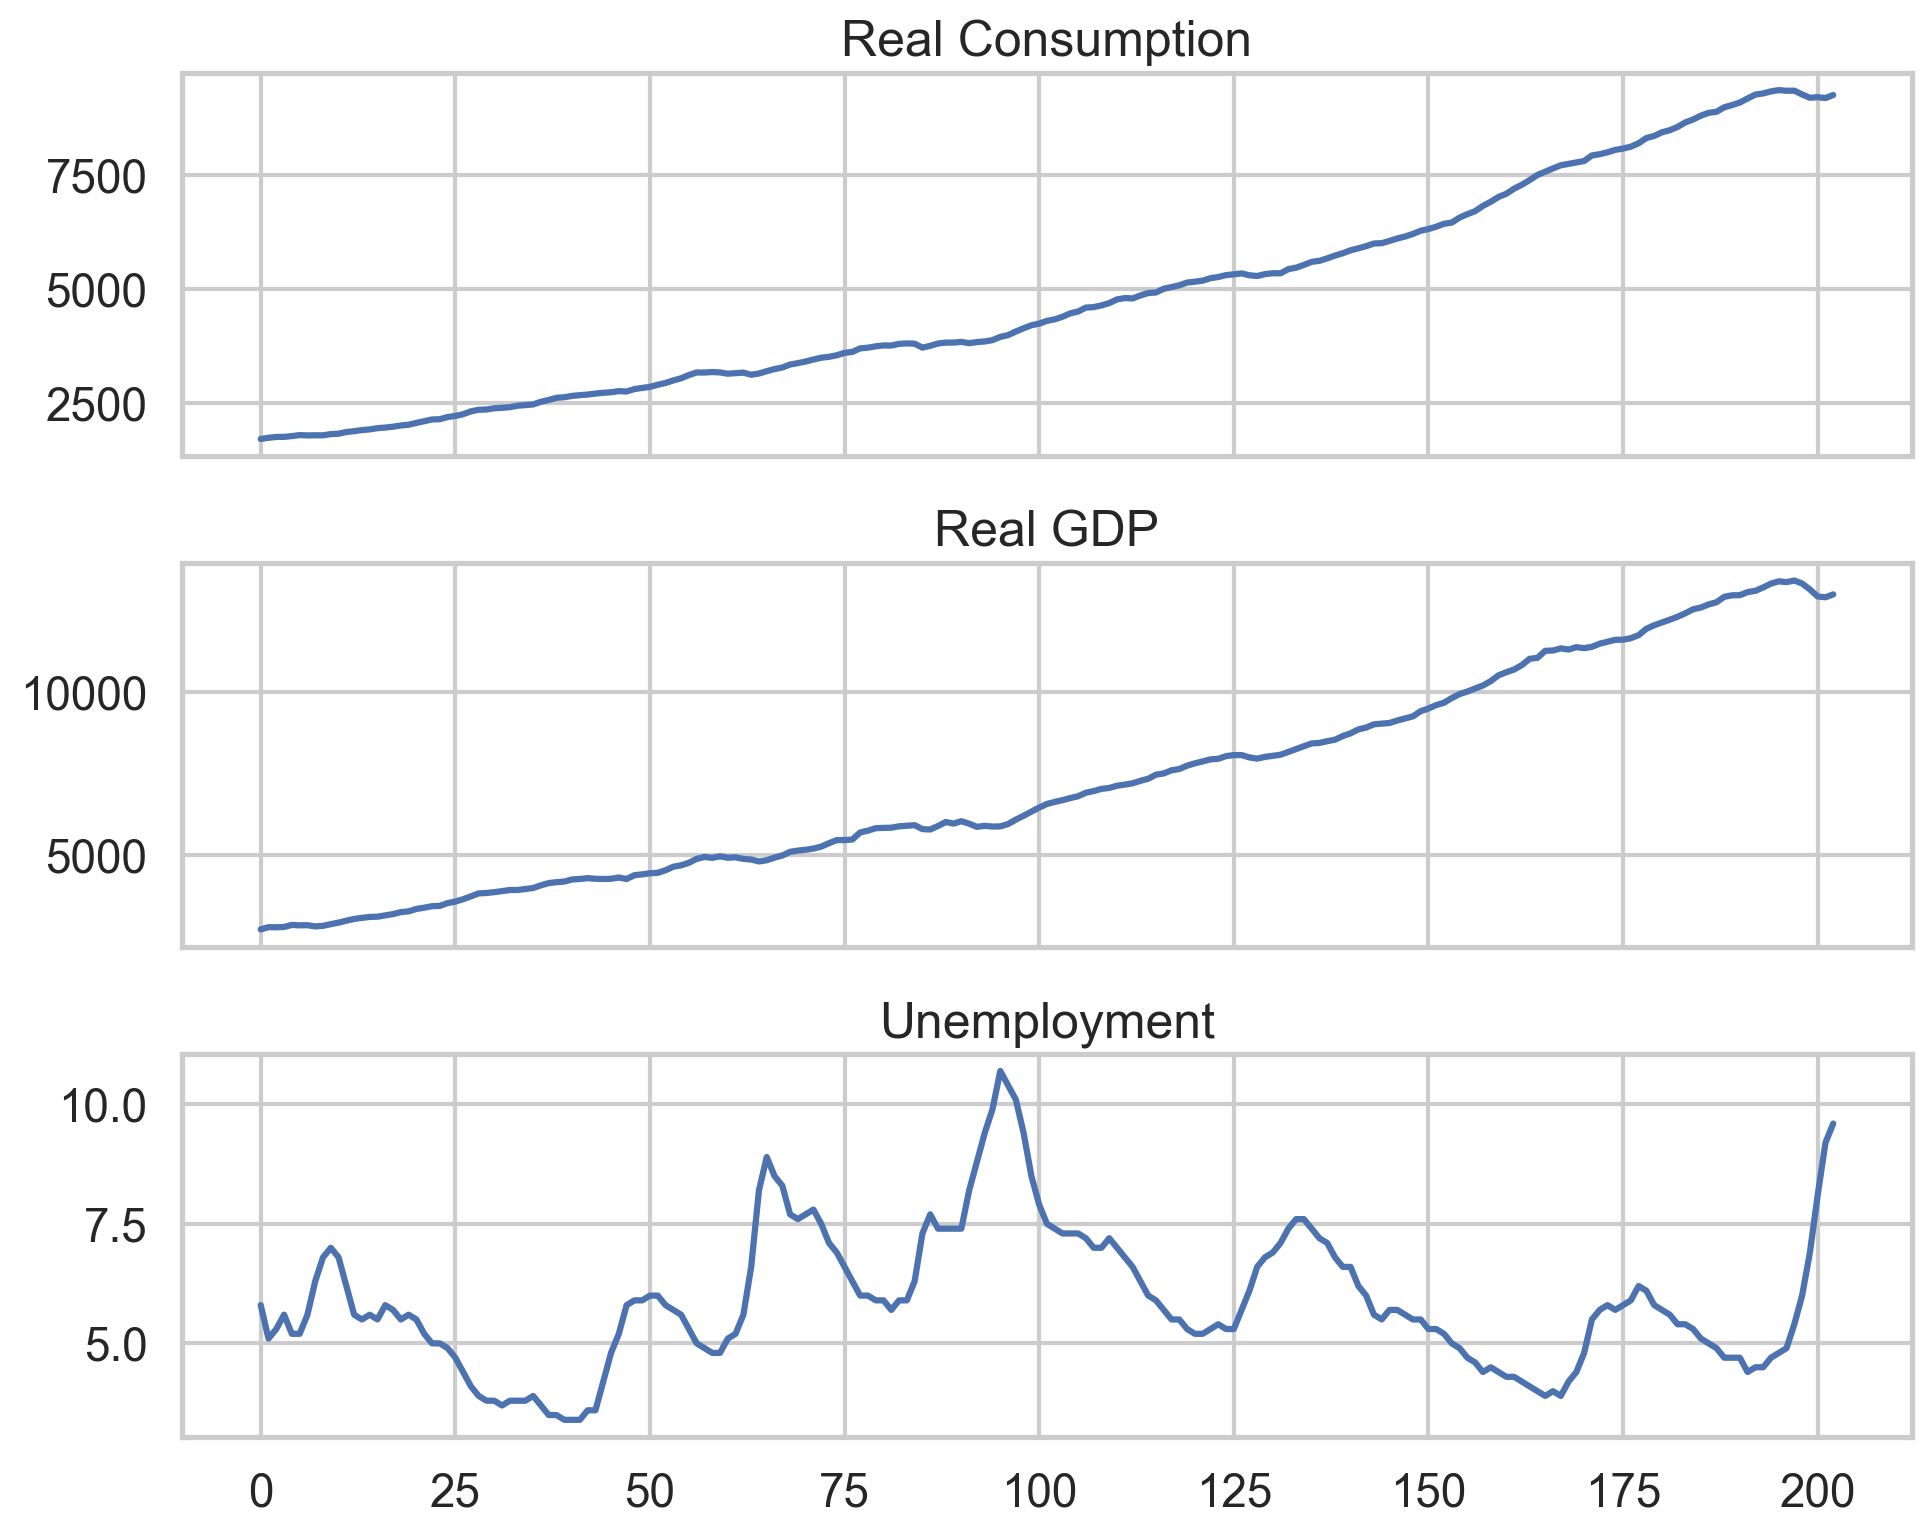

In [30]:
fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

data["realcons"].plot(ax=ax[0], title="Real Consumption")
data["realgdp"].plot(ax=ax[1], title="Real GDP")
data["unemp"].plot(ax=ax[2], title="Unemployment")

plt.tight_layout()
plt.show()


Assume the linear factor model

$$
    \text{realcons}_t 
    = \beta_0 
    + \beta_1 \text{realgdp}_t 
    + \beta_2 \text{realint}_t 
    + \beta_3 \text{unemp}_t
    + \epsilon_t
    \qquad \epsilon_t \sim \mathcal{N}(0, \sigma^2)
$$

In [ ]:
y = #TODO
X = #TODO
X = sm.add_constant(X)
model = #TODO
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               realcons   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.024e+04
Date:                Thu, 05 Feb 2026   Prob (F-statistic):          3.16e-286
Time:                        08:48:00   Log-Likelihood:                -1187.0
No. Observations:                 203   AIC:                             2382.
Df Residuals:                     199   BIC:                             2395.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -446.9655     28.915    -15.458      0.0

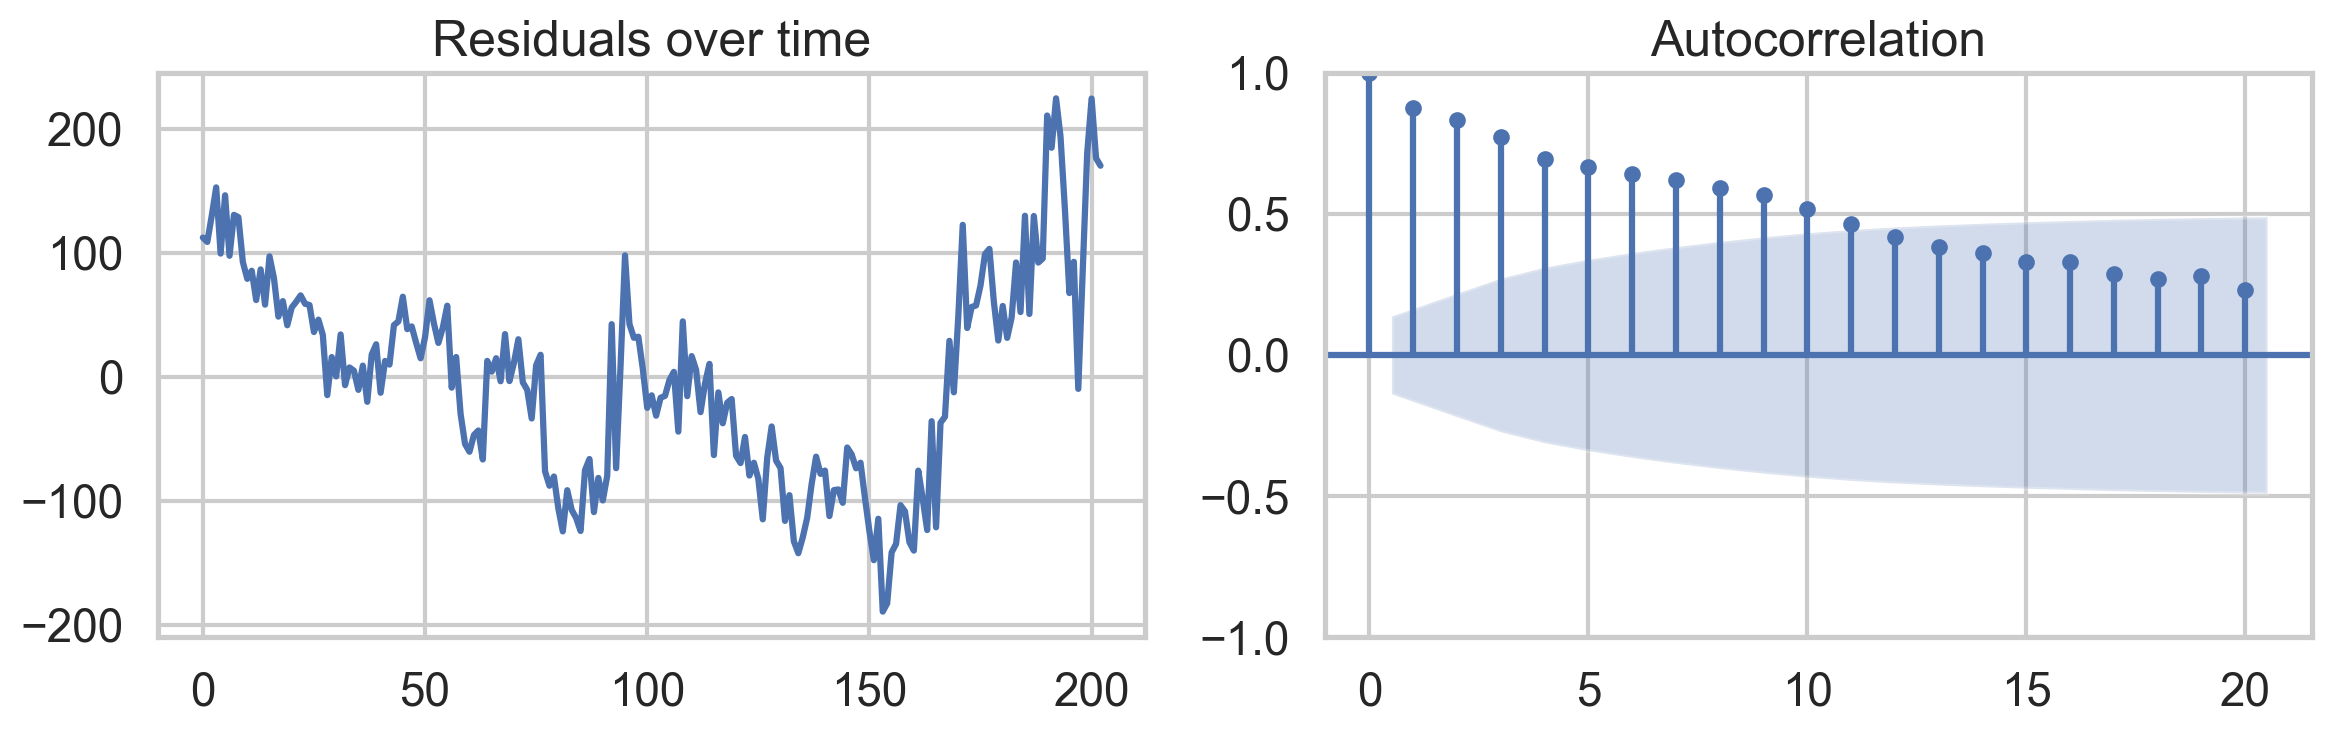

In [32]:
# residual diagnostics
resid = model.resid

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(resid)
ax[0].set_title("Residuals over time")

sm.graphics.tsa.plot_acf(resid, lags=20, ax=ax[1])

plt.tight_layout()
plt.show()

- Autocorrelation of residuals -> violates OLS assumptions (model misspecification)
- Macro residuals are not normally distributed 

## CAPM = Capital Asset Pricing Model

The CAPM is a linear factor model used in finance to explain the returns of an asset based on the returns of the market portfolio.

$$
    R_i - R_f
    = 
    \alpha_i 
    + \beta_i (R_m - R_f) + \epsilon_i
    \qquad \epsilon_i \sim \mathcal{N}(0, \sigma^2)
$$

where:

- $R_i$ is the return of asset $i$
- $R_f$ is the risk-free rate
- $R_m$ is the return of the market portfolio
- $\beta_i$ is the sensitivity of asset $i$ to the market portfolio

In [33]:
import yfinance as yf

We proxy the risk-free rate with the 3-month Treasury bill rate and the market return with the S&P 500 index return.

In [34]:
market = "^GSPC"  # S&P 500
risk_free = "^IRX"  # 3-month T-bill
asset = "AAPL"  # pick an asset, e.g., Apple Inc.
# asset = "JPM"

tickers = [asset, market, risk_free]
data = yf.download(tickers, start="2015-01-01", auto_adjust=True)["Close"]
data.rename(columns={"^GSPC": "SP500", "^IRX": "RiskFree"}, inplace=True)
data.head()

[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,SP500,RiskFree
Date,,,
2015-01-02,24.237556,2058.199951,0.015
2015-01-05,23.554741,2020.579956,0.003
2015-01-06,23.556961,2002.609985,0.020
2015-01-07,23.887280,2025.900024,0.020
2015-01-08,24.805086,2062.139893,0.018


In [ ]:
data["RiskFree"] = data["RiskFree"] / 100  # convert to decimal
df_stocks = data[[asset, "SP500"]].pct_change()  # daily returns
df_stocks["RiskFree"] = data["RiskFree"] / 252  # daily risk-free rate
df_stocks = df_stocks.dropna()
df_stocks["asset_excess"] = #TODO
df_stocks["SP500_excess"] = #TODO
df_stocks.head()

/var/folders/cx/lqg_nbts2gd5hgdpftngz4z80000gn/T/ipykernel_29086/4147941625.py:2: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Ticker,AAPL,SP500,RiskFree,asset_excess,SP500_excess
Date,,,,,
2015-01-05,-0.028172,-0.018278,1.190476e-07,-0.028172,-0.018278
2015-01-06,0.000094,-0.008893,7.936508e-07,0.000093,-0.008894
2015-01-07,0.014022,0.011630,7.936508e-07,0.014021,0.011629
2015-01-08,0.038422,0.017888,7.142857e-07,0.038422,0.017888
2015-01-09,0.001072,-0.008404,5.952381e-07,0.001072,-0.008404


In [ ]:
X = df_stocks["SP500_excess"]
Y = df_stocks["asset_excess"]
X_sm = #TODO  # adds a constant term to the predictor
model = #TODO
results = #TODO
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           asset_excess   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     3482.
Date:                Thu, 05 Feb 2026   Prob (F-statistic):               0.00
Time:                        08:48:19   Log-Likelihood:                 8352.0
No. Observations:                2788   AIC:                        -1.670e+04
Df Residuals:                    2786   BIC:                        -1.669e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0005      0.000      1.979   

Estimated CAPM parameters:
Alpha: 0.0005
Beta: 1.2024


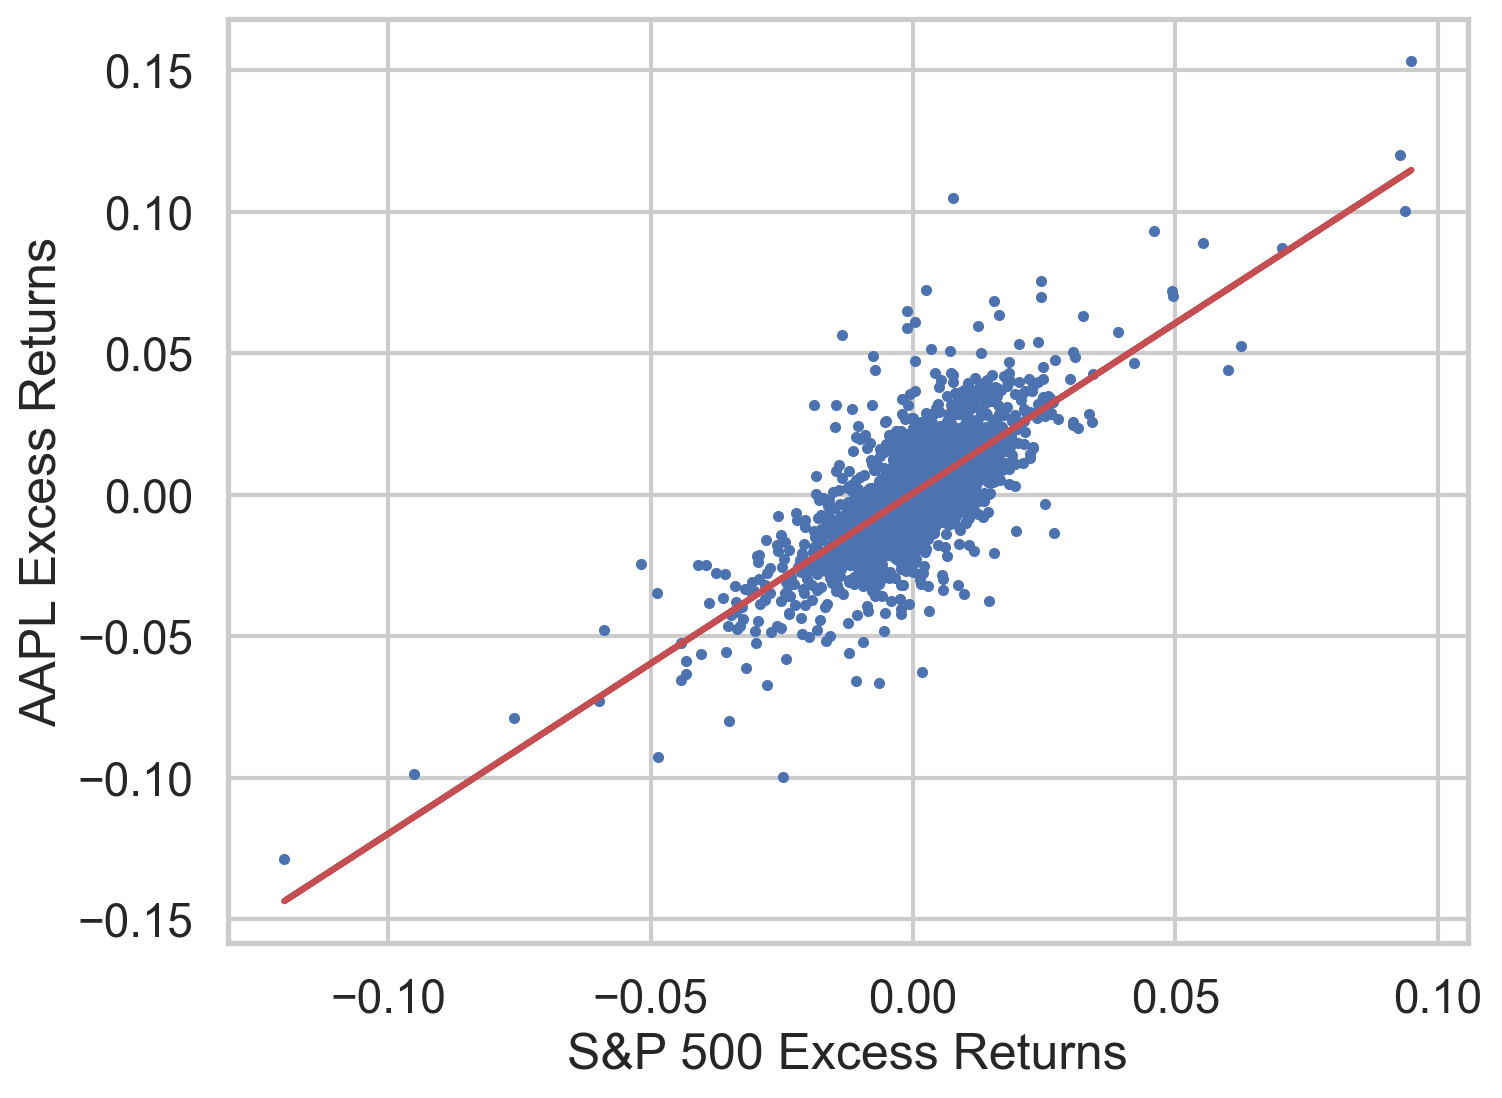

In [ ]:
alpha, beta = #TODO
print(f"Estimated CAPM parameters:\nAlpha: {alpha:.4f}\nBeta: {beta:.4f}")

fig, ax = plt.subplots()
ax.plot(X, Y, "o", markersize=3)
ax.plot(X, results.predict(X_sm), "r-")
ax.set_xlabel("S&P 500 Excess Returns")
ax.set_ylabel(f"{asset} Excess Returns")
plt.show()

In [ ]:
## Rolling beta for AAPL

window = 252  # 1 year of trading days
beta_roll = #TODO

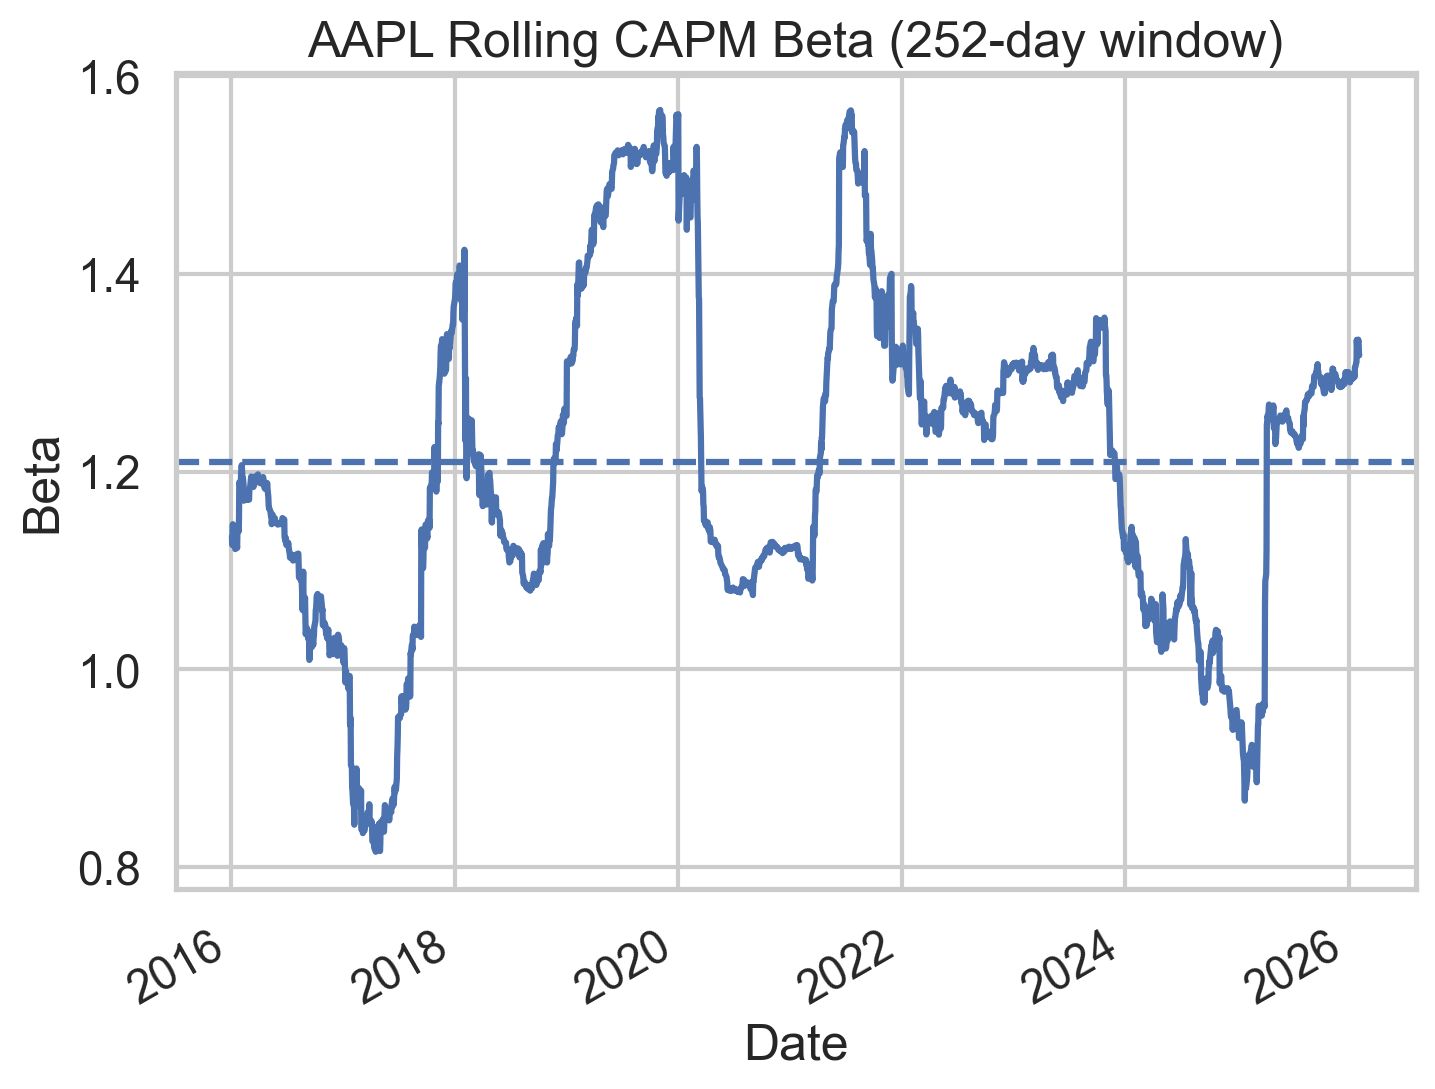

In [39]:
# plot
fig, ax = plt.subplots()
beta_roll.plot(ax=ax)
ax.axhline(beta_roll.mean(), linestyle="--")
ax.set_title(f"{asset} Rolling CAPM Beta ({window}-day window)")
ax.set_ylabel("Beta")
plt.show()

## Tests

### The *t*-test: Statistical Significance of Predictors

In a linear regression model
$$
Y = X\beta + \varepsilon,
$$
the **Student *t*-test** is used to assess whether an individual regression coefficient $\beta_j$ is statistically different from zero. Intuitively, it answers the question:

> *Is the estimated effect of predictor $X_j$ distinguishable from noise?*

This test is central to inference in linear regression and helps identify which features contribute meaningfully to explaining the response variable.

---

#### 1. Hypotheses

For each coefficient $\beta_j$, we test:
- **Null hypothesis**:  
  $
  H_0:\ \beta_j = 0
  $
  The predictor $X_j$ has no linear effect on $Y$.
- **Alternative hypothesis**:  
  $
  H_1:\ \beta_j \neq 0
  $
  The predictor $X_j$ has a non-zero linear effect.

---

#### 2. Test statistic

The *t*-statistic is a **signal-to-noise ratio**:
$$
t_j = \frac{\hat{\beta}_j}{\operatorname{SE}(\hat{\beta}_j)},
$$
where $\operatorname{SE}(\hat{\beta}_j)$ is the standard error of the estimator $\hat{\beta}_j$.

Under the null hypothesis $H_0$ and standard regression assumptions (Gaussian errors, correct model specification),
$$
t_j \sim t_{n-p},
$$
a Student *t* distribution with $n - p$ degrees of freedom, where:
- $n$ is the sample size,
- $p$ is the number of estimated coefficients (including the intercept).

---

#### 3. Interpretation

| Metric | Rule of thumb | Interpretation |
|------|---------------|----------------|
| $\|t_j\|$ | $\gtrsim 1.96$ | Large relative to estimation uncertainty |
| **p-value** | $< 0.05$ | **Statistically significant**: reject $H_0$ |
| **p-value** | $\ge 0.05$ | **Not significant**: insufficient evidence against $H_0$ |

---

#### What is a *p-value*?

The **p-value** is the probability—*under the null hypothesis*—of observing a test statistic at least as extreme as the one computed from the data:
$$
\text{p-value}
= \mathbb{P}_{H_0}\!\left(|T| \ge |t_j|\right).
$$

Equivalently:
> *If $\beta_j = 0$ were true, how surprising would this estimate be?*

A small p-value means the observed coefficient would be unlikely if the predictor truly had no effect.

---

### F test for overall significance of the regression
https://en.wikipedia.org/wiki/F-test

The F-test in linear regression is used to assess the overall significance of the regression model. It tests whether at least one of the predictor variables has a non-zero coefficient, indicating that the model provides a better fit to the data than a model with no predictors (i.e., only an intercept).

1. The Hypotheses
* **$H_0: \beta_1 = \beta_2 = ... = \beta_p = 0$**: None of the predictors have an effect on the outcome.
* **$H_1$: At least one $\beta_j \neq 0$**: At least one predictor is statistically significant.

2. The Test Statistic
The F-statistic is calculated as:
$$F = \frac{(SSR / p)}{(SSE / (n - p - 1))}$$
Where:
- $SSR$ = Regression Sum of Squares (explained variance)
- $SSE$ = Error Sum of Squares (unexplained variance)
- $p$ = Number of predictors
- $n$ = Number of observations

Under the null hypothesis, the F-statistic follows an F-distribution with $p$ and $n - p - 1$ degrees of freedom.

In [40]:
# example: let us generate some data again

np.random.seed(42)
n = 100

# Generate synthetic data
x1 = np.random.uniform(-5, 5, n)
x2 = np.random.uniform(-5, 5, n)

# True model
beta = np.array([2.0, 1.5, -1e-3])
noise = np.random.normal(0, 1, n)

# Fit model
y = beta[0] + beta[1] * x1 + beta[2] * x2 + noise
x0 = np.ones(n)
X = np.column_stack([x0, x1, x2])

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     964.5
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           9.67e-65
Time:                        08:48:19   Log-Likelihood:                -139.10
No. Observations:                 100   AIC:                             284.2
Df Residuals:                      97   BIC:                             292.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0994      0.099     21.154      0.0

F-statistic (joint significance of all coefficients):
Prob(F) is essentially zero. p-value < 0.0001, reject H0: at least one beta is significant.

